In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
%config InlineBackend.figure_format = 'retina'

## Self Play Plot

In [2]:
def plot(x, y, fig, style = '-', legend = None, title = "performance", y_label = "total rewards"):
    
    plt.plot(x, y, style)
    plt.title(title)
    if legend is not None:
        plt.legend(legend)
    plt.xlabel("episodes")
    plt.ylabel(y_label)
    return plt
#     plt.show()
    
def readResult(filename, train_episode = 40):
    x_reward = []
    y_reward = []
    x_update = []
    y_update = []
    x_seperate = []
    y_seperate = []
    seperate_i = 0
    seperate_j = 0
    
    x_seperate.append([])
    y_seperate.append([])
    f = open(filename, 'r')
    lines = f.readlines()
    for i,l in enumerate(lines):
        if l == "Update agent\n":
            seperate_i += 1
            seperate_j += 1
            x_seperate.append([])
            y_seperate.append([])
            y_update.append(y_reward[-1])
            x_update.append(x_reward[-1])
        else:
            y_reward.append(float(l[0:-1]))
            x_reward.append((i + 1) * train_episode)
            
            y_seperate[seperate_j].append(float(l[0:-1]))
            x_seperate[seperate_i].append(((i + 1) * train_episode))
    return x_reward, y_reward,x_update, y_update, x_seperate, y_seperate

def mean(y):
    meany = []
    sum = 0
    for i, v in enumerate(y):
        sum += v
        meany.append(sum / (i + 1))
    return meany

In [ ]:
fig_num = 1
fig = plt.figure(num = fig_num)
x_reward, y_reward,x_update, y_update, x_seperate, y_seperate = readResult("../../result_gqf_v10_sepcific_2.txt")
# my = mean(y)
for i in range(len(x_seperate)):
    plot(x_seperate[i], y_seperate[i], fig)
plot(x_update, y_update, fig, style = 'ro')

# x_reward, y_reward,x_update, y_update, x_seperate, y_seperate = readResult("result_gqf_v6.txt")
# # my = mean(y)
# for i in range(len(x_seperate)):
#     plot(x_seperate[i], y_seperate[i], fig)

# x_reward, y_reward,x_update, y_update, x_seperate, y_seperate = readResult("result_gqf_v6(non-norm).txt")
# # my = mean(y)
# for i in range(len(x_seperate)):
#     plot(x_seperate[i], y_seperate[i], fig,legend = ["8f+damageToNexus(norm)", "8f+damageToNexus"])
# fig.show()
# plot(x,my, ["withOnehotAndNormalize","mean"], fig = 3)
for i in range(len(x_seperate)):
    fig_num += 1
    fig = plt.figure(num = fig_num)
    plot(x_seperate[i], y_seperate[i], fig)

## Model based vs model-free

In [1]:
def read_data(filename, agent_self):
    f = open(filename, 'r')
    lines = f.readlines()
    names = []
    values = []
    for i, l in enumerate(lines):
        if i % 3 == 0:
            print(l)
            if l == agent_self:
                names.append("agent_self")
            else:
                names.append("enemy_" + str(int(i / 3 + 1)))
        elif i % 3 == 1:
            values.append(float(l))
#     print(names)
#     print(values)
    return names, values
def plot(all_value, all_names, legends):
    fig=plt.figure(figsize=(15, 15), dpi= 160, facecolor='w', edgecolor='k')
    for i in range(len(legends)):
        plt.plot(all_value[i], all_names[i], 'o')
        
    plt.title('Model base agent vs model free agents')
    plt.legend(legends)
    plt.xlabel("agents name")
    plt.ylabel("rewards")

    return plt
    
data_file = ["../../result_model_based_grid_v10.txt", "../../result_model_based_grid_v6.txt", "../../result_model_based_grid_v11.txt"]
legends = ["ak = 80, depth = 1", "ak = [7, 7], depth = 2", "ak = [10, 5] depth = 2"]#, "model free agent"]
all_values = []
all_names = []
# skips = [1, 2]
for i, df in enumerate(data_file):
#     if i in skips:
#         continue
    values, names = read_data(df, "self_model_free\n")
    all_values.append(values)
    all_names.append(names)
    
p = plot(all_values, all_names, legends)
p.show()
        

self_model_free

TugOfWar_eval.pupdate_121

TugOfWar_eval-Copy1.p

TugOfWar_eval.p

TugOfWar_eval.pupdate_300

self_model_free

TugOfWar_eval.pupdate_121

TugOfWar_eval-Copy1.p

TugOfWar_eval.p

TugOfWar_eval.pupdate_300

self_model_free

TugOfWar_eval.pupdate_121

TugOfWar_eval-Copy1.p

TugOfWar_eval.p

TugOfWar_eval.pupdate_300

self_model_free

TugOfWar_eval-Copy2.p

TugOfWar_eval.pupdate_121

TugOfWar_eval-Copy1.p

TugOfWar_eval.p

TugOfWar_eval.pupdate_300

self_model_free

TugOfWar_eval-Copy2.p

TugOfWar_eval.pupdate_121

TugOfWar_eval-Copy1.p



NameError: name 'plt' is not defined

### The GVFs loss and learning curve

In [ ]:
fig_num = 1
fig = plt.figure(num = fig_num)
x_reward, y_reward,x_update, y_update, x_seperate, y_seperate = readResult("../../result_gqf_GVFs_all_1_sepcific_12_GVFs_loss.txt")
# my = mean(y)
for i in range(len(x_seperate)):
    plot(x_seperate[i][0:375], y_seperate[i][0:375], fig)
plot(x_update, y_update, fig, style = 'ro', title = "GVFs loss", y_label = "loss")

fig_num = 2
fig = plt.figure(num = fig_num)
x_reward, y_reward,x_update, y_update, x_seperate, y_seperate = readResult("../../result_self_play_2l_grid_decom_v4_.txt")
for i in range(len(x_seperate)):
    plot(x_seperate[i], y_seperate[i], fig)
plot(x_update, y_update, fig, style = 'ro')

### The GVFs loss by steps

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_loss_step(data, title = "GVFs loss", vmin=0, vmax=0.1):
    plt.title(title)
    plt.matshow(data, vmin=vmin, vmax=vmax)

    plt.show()
    
test_data = np.array([[0.0268, 0.0264, 0.0237, 0.0185, 0.0147, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000],
                     [0.0266, 0.0264, 0.0220, 0.0147, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000],
                     [0.0404, 0.0412, 0.0432, 0.0424, 0.0431, 0.0436, 0.0439, 0.0385, 0.0396,
        0.0402, 0.0399, 0.0399, 0.0402, 0.0404, 0.0403, 0.0405, 0.0397, 0.0390,
        0.0389, 0.0388, 0.0381, 0.0377, 0.0363, 0.0356, 0.0339, 0.0283, 0.0274,
        0.0152, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000],
                     [0.0296, 0.0303, 0.0308, 0.0314, 0.0321, 0.0322, 0.0321, 0.0323, 0.0324,
        0.0326, 0.0327, 0.0329, 0.0332, 0.0334, 0.0334, 0.0334, 0.0331, 0.0332,
        0.0331, 0.0328, 0.0329, 0.0327, 0.0324, 0.0323, 0.0322, 0.0321, 0.0320,
        0.0319, 0.0318, 0.0315, 0.0313, 0.0310, 0.0305, 0.0299, 0.0291, 0.0294,
        0.0185, 0.0153, 0.0000, 0.0000],
#                      [0.1578, 0.1597, 0.1616, 0.1633, 0.1625, 0.1578, 0.1590, 0.1606, 0.1625,
#         0.1630, 0.1627, 0.1620, 0.1629, 0.1634, 0.1612, 0.1613, 0.1605, 0.1615,
#         0.1629, 0.1634, 0.1629, 0.1635, 0.1624, 0.1640, 0.1608, 0.1639, 0.1566,
#         0.1539, 0.1451, 0.1427, 0.1262, 0.0982, 0.0939, 0.0723, 0.0929, 0.0751,
#         0.0867, 0.0934, 0.1038, 0.1036],
                     [0.0236, 0.0245, 0.0257, 0.0244, 0.0258, 0.0249, 0.0252, 0.0266, 0.0264,
        0.0259, 0.0259, 0.0149, 0.0147, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000],])
plot_loss_step(test_data, vmin=test_data.min(), vmax=test_data.max())
# for td in test_data:
#     print()
#     plot_loss_step([td], vmin=td.min(), vmax=td.max())

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

plt.rcParams["font.family"] = "Arial"#"Helvetica"

In [3]:
def plot_lc(x, y_list, figure_info):
    y_means = []
    y_stds = []
    for y in y_list:
        y_means.append(np.mean(y, axis=0))
        y_stds.append(np.std(y, axis=0))

    plt.figure()
    plt.title(figure_info["title"])
    
    plt.xlabel(figure_info["x_name"])
    plt.ylabel(figure_info["y_name"])
#     plt.gca().invert_yaxis()
    
    # box-like grid
#     plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    colors_list = ["salmon", "cornflowerblue", "limegreen", "gray"]
    
    for i in range(len(y_list)):
        plt.fill_between(x, y_means[i] - y_stds[i], y_means[i] + y_stds[i], alpha=0.3, color=colors_list[i])
        plt.plot(x, y_means[i], '-', label=figure_info["legend"][i], color=colors_list[i])
    plt.legend()

    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().set_axisbelow(True)
    plt.gca().yaxis.grid(color='white')
    plt.gca().xaxis.grid(color='white')
    plt.gca().patch.set_facecolor('gray')
    plt.gca().patch.set_alpha(0.15)
#     plt.gca().set_facecolor('lightgray')
    plt.savefig(figure_info["title"])
    plt.show()
    
def read_data(result_file, length = 12000, test_gap = 40, game_runs = 10, entail = ""):
    
    test_num = length // test_gap
    x = [(i) * test_gap for i in range(test_num + 1)]
    y = []
    for i in range(game_runs):
        lines = open("{}_{}{}.txt".format(result_file, i + 1, entail)).readlines()
        y.append([])
        for j, score in enumerate(lines):
            if j > test_num:
                break
#             if float(score) < 0:
#                 print(score)
#                 input()
            y[i].append(float(score))
#         print(i)
#         print(len(y[i]))
#     del y[3]

    return np.array(x), np.array(y[:-1])
            

In [4]:
%config InlineBackend.figure_format = 'retina'
x, y_1 = read_data("../../result_self_play_2l_grid_decom_v4", length = 13000, test_gap = 40, game_runs = 10)
x, y_2 = read_data("../../result_gqf_v10_sepcific", length = 13000, test_gap = 40, game_runs = 10)
x, y_3 = read_data("../../result_gqf_GVFs_all_1_sepcific", length = 13000, test_gap = 40, game_runs = 10)
x, y_r = read_data("../../result_dqn_random", length = 13000, test_gap = 40, game_runs = 10)
# print(x_1, y_1)
plot_lc(x, [y_1, y_2, y_3, y_r], 
        {"title": "Tug-of-War Learning Curve", "x_name": "Episodes", "y_name": "Average Reward", "legend": ["DQN", "ESP_17f(ours)", "ESP_131f(ours)", "Random"]})

FileNotFoundError: [Errno 2] No such file or directory: '../../result_self_play_2l_grid_decom_v4_1.txt'

In [5]:
def plot_loss(x_1, x_2, y_1, y_2, figure_info):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)    # The big subplot
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    # Turn off axis lines and ticks of the big subplot
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#     ax.set_facecolor('w')

    # Set common labels
    ax.set_xlabel(figure_info["x_name"])
    ax.set_ylabel(figure_info["y_name"])
#     ax.set_title(figure_info["title"])
    fig.suptitle(figure_info["title"])

    y_1_mean = np.mean(y_1, axis=0)
    y_1_std = np.std(y_1, axis=0)
    y_2_mean = np.mean(y_2, axis=0)
    y_2_std = np.std(y_2, axis=0)
    
    # plot the std deviation as a transparent range at each training set size
    color_1 = "Gold"
    color_2 = "skyblue"
    ax1.fill_between(x_1, y_1_mean - y_1_std, y_1_mean + y_1_std, alpha=0.3, color=color_1)
    ax2.fill_between(x_2, y_2_mean - y_2_std, y_2_mean + y_2_std, alpha=0.3, color=color_2)
#     plt.fill_between(x_3, y_3_mean - y_3_std, y_3_mean + y_3_std, alpha=0.3, color=color_3)
    
    # plot the average training and test score lines at each training set size
    ax1.plot(x_1, y_1_mean, '-', label=figure_info["legend"][0], color=color_1)
    ax2.plot(x_2, y_2_mean, '-', label=figure_info["legend"][1], color=color_2)
#     plt.plot(x_3, y_3_mean, '-', label=figure_info["legend"][2], color=color_3)
    ax1.legend()
    ax2.legend()
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
#     plt.ylim(-.1,1.1)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.set_axisbelow(True)
    ax1.yaxis.grid(color='white')
    ax1.xaxis.grid(color='white')
    ax1.patch.set_facecolor('gray')
    ax1.patch.set_alpha(0.15)
    
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.set_axisbelow(True)
    ax2.yaxis.grid(color='white')
    ax2.xaxis.grid(color='white')
    ax2.patch.set_facecolor('gray')
    ax2.patch.set_alpha(0.15)
    
    
    fig.savefig(figure_info["title"])
    fig.show()

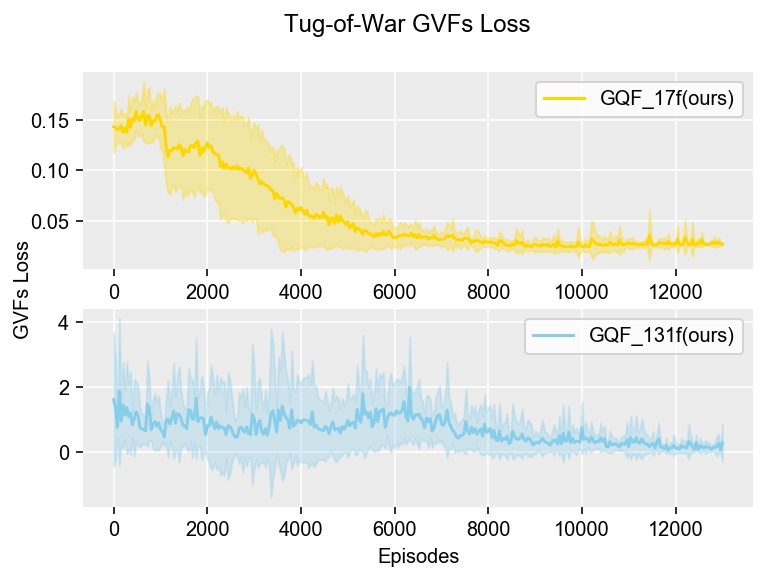

In [21]:
%config InlineBackend.figure_format = 'retina'
x_1, y_1 = read_data("../../result_gqf_v10_sepcific", length = 13000, test_gap = 40, game_runs = 10, entail = "_GVFs_loss")
x_2, y_2 = read_data("../../result_gqf_GVFs_all_1_sepcific", length = 13000, test_gap = 40, game_runs = 10, entail = "_GVFs_loss")
# print(x_1, y_1)
plot_loss(x_1, x_2, y_1, y_2,
        {"title": "Tug-of-War GVFs Loss", "x_name": "Episodes", "y_name": "GVFs Loss", "legend": ["GQF_17f(ours)", "GQF_131f(ours)"]})

In [13]:
lines = open("../../result_self_play_2l_grid_decom_random.txt", "r").readlines()
print(len(lines))

file_num = 10
avg_num = len(lines) // file_num
i = 0
f = open("../../result_self_play_2l_grid_decom_random.txt", "r")
for l_idx, l in enumerate(lines):
    if l_idx % avg_num == 0:
        f.close()
        f = open("../../result_dqn_random_{}.txt".format(i + 1), "w")
        i += 1
    f.write(l)
f.close()
    

10785


In [1]:
ps = open("../../explanations/tug_of_war/state_pair_test_example/action_exp.txt", "r").readlines()
import numpy as np
def pretty_print_to_state(pretty_state):
    state = np.zeros(68)
    count = 0
    self_units = []
    enemy_units = []
    for i, ps in enumerate(pretty_state):
        ps = ps.replace(".0", " ")
        ps = ps.replace(",", " ")
        ps = ps.replace(":", " ")
        
#         print(ps)
        numbers = [float(word) for word in ps.split() if word.isdigit()]
#         print(numbers)
        if len(numbers) == 0:
            continue
        numbers_np = np.array(numbers)
        if count == 0:
            state[-1], state[0] = numbers_np[0], numbers_np[1]
        if count == 1:
            state[1:8] = numbers_np
        if count == 2:
            state[8:15] = numbers_np
        if count in list(range(3, 11)):
            self_units.extend(numbers)
        if count == 10:
            state[15:39] = self_units
        if count in list(range(11, 19)):
            enemy_units.extend(numbers)
        if count == 18:
            state[39:63] = enemy_units
        if count == 19:
            state[63: 67] = numbers_np
        count += 1
    print(state.tolist())
pretty_print_to_state(ps)

[400.0, 0.0, 2.0, 0.0, 1.0, 2.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2000.0, 2000.0, 2000.0, 1840.0, 7.0]


ESP agent Traning, Evaluation, Producing Explanation
============================

## Installation
Install dependencies
```bash
    sudo apt install libopenmpi-dev ffmpeg
```

Install pip packages (Anaconda recommended)
```bash
    pip install -r requirements.txt
```

## Prerequisite of Tug-of-War env
1. Download StarCraft 2
https://github.com/Blizzard/s2client-proto#downloads (4.7.1 recommended, only for Linux)
2. The StarCraft need to be installed at the ~/ path.

To run Tug-War run the following command first:
```bash
    1. pip install -r requirements_ToW.txt
    2. export PYTHONPATH=path/to/dir/sc2env;path/to/dir/sc2env/sc2env/xai_replay/ui/viz/py_backend/proto;
    4. cd path/to/dir/sc2env
    5. git checkout new-sensors
    
    (back to the ESP_code)
    6. cd Tug-of-War/
```
## Traning new agent

a. Cart Pole
```bash
    python3 CP_ESP.py train
```
b. Lunar Lander

```bash
    python3 LL_ESP.py train
```
c. Tug-of-War 17f

```bash
    python3 -m sc2env.play_tug_of_war -f tasks/tug_of_war/gqf/v10_sepcific_new/ -tk task_gqf_2p_2l_grid
```

d. Tug-of-War 131f

```bash
    python3 -m sc2env.play_tug_of_war -f tasks/tug_of_war/gqf/GVFs_all_1_sepcific_new/ -tk task_gqf_2p_2l_grid
```
## Evaluation for the trained model

a. Cart Pole
```bash
    python3 CP_ESP.py eval
```
b. Lunar Lander

```bash
    python3 LL_ESP.py eval
```

c. Tug-of-War 17f

```bash
    python3 -m sc2env.play_tug_of_war -f tasks/tug_of_war/gqf/v10_sepcific_eval/ -tk task_gqf_2p_2l_grid
```

d. Tug-of-War 131f

```bash
    python3 -m sc2env.play_tug_of_war -f tasks/tug_of_war/gqf/GVFs_all_1_sepcific_eval/ -tk task_gqf_2p_2l_grid
```
## Producing Explanation
a. Cart Pole
```bash
    python3 CP_ESP.py exp
```
b. Lunar Lander

```bash
    python3 LL_ESP.py exp
```

c. Tug-of-War 17f

```bash
    python3 -m sc2env.play_tug_of_war -f tasks/tug_of_war/gqf/v10_sepcific_exp/ -tk task_gqf_2p_2l_grid
```

d. Tug-of-War 131f

```bash
    python3 -m sc2env.play_tug_of_war -f tasks/tug_of_war/gqf/GVFs_all_1_sepcific_exp/ -tk task_gqf_2p_2l_grid
```

## Directory of explanation generted
a. Cart Pole
```bash
    CartPole_ESP/CartPole_ESP_exp
```
b. Lunar Lander

```bash
    LunarLander_ESP/LunarLander_ESP_exp
```

c. Tug-of-War 17f

```bash
    Tug-of-War/explanations/tug_of_war/gqf/v10_sepcific
```

d. Tug-of-War 131f

```bash
    Tug-of-War/explanations/tug_of_war/gqf/GVFs_all_1_sepcific
```

In [1]:
1e-4

0.0001